<a href="https://colab.research.google.com/github/m8ncat/MLops-2/blob/main/MLops_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Настройка ClearML

In [1]:
!pip install clearml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.0 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [2]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=2BMI1GRTH5RC789COPHT
%env CLEARML_API_SECRET_KEY=FpsLpQTpmYWpvRX4YXsCpSLv1lHCVYGcF2qjc7sgb42ZJWu3iq

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=2BMI1GRTH5RC789COPHT
env: CLEARML_API_SECRET_KEY=FpsLpQTpmYWpvRX4YXsCpSLv1lHCVYGcF2qjc7sgb42ZJWu3iq


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Add the following two lines to your code, to have ClearML automatically log your experiment
from clearml import Task

task = Task.init(project_name='MLops_2', task_name='BayesianGaussianMixture')

ClearML Task: created new task id=7ce357f59b0f4ea08d60ab4ed078f66f
2024-01-19 05:33:21,105 - clearml.Task - INFO - No repository found, storing script code instead
ClearML results page: https://app.clear.ml/projects/4e5ae497564c4a43bd943799391cf6ad/experiments/7ce357f59b0f4ea08d60ab4ed078f66f/output/log


# Подключение к Kaggle для загрузки данных прямо из браузера

In [4]:
from google.colab import files

In [5]:
uploaded = files.upload()

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


# Загружаем данные с Kaggle

In [6]:
!kaggle competitions download -c tabular-playground-series-jul-2022

 56% 11.0M/19.6M [00:00<00:00, 111MB/s]
100% 19.6M/19.6M [00:00<00:00, 125MB/s]


In [7]:
!unzip tabular-playground-series-jul-2022.zip

Archive:  tabular-playground-series-jul-2022.zip
  inflating: data.csv                
  inflating: sample_submission.csv   


# Загружаем данные в Pandas

In [8]:
import pandas as pd # Библиотека Pandas для работы с табличными данными

In [9]:
data = pd.read_csv('/content/data.csv', index_col='id')
submission = pd.read_csv('/content/sample_submission.csv')

# Анализ данных

In [10]:
data.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [11]:
submission.head()

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

In [13]:
data.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


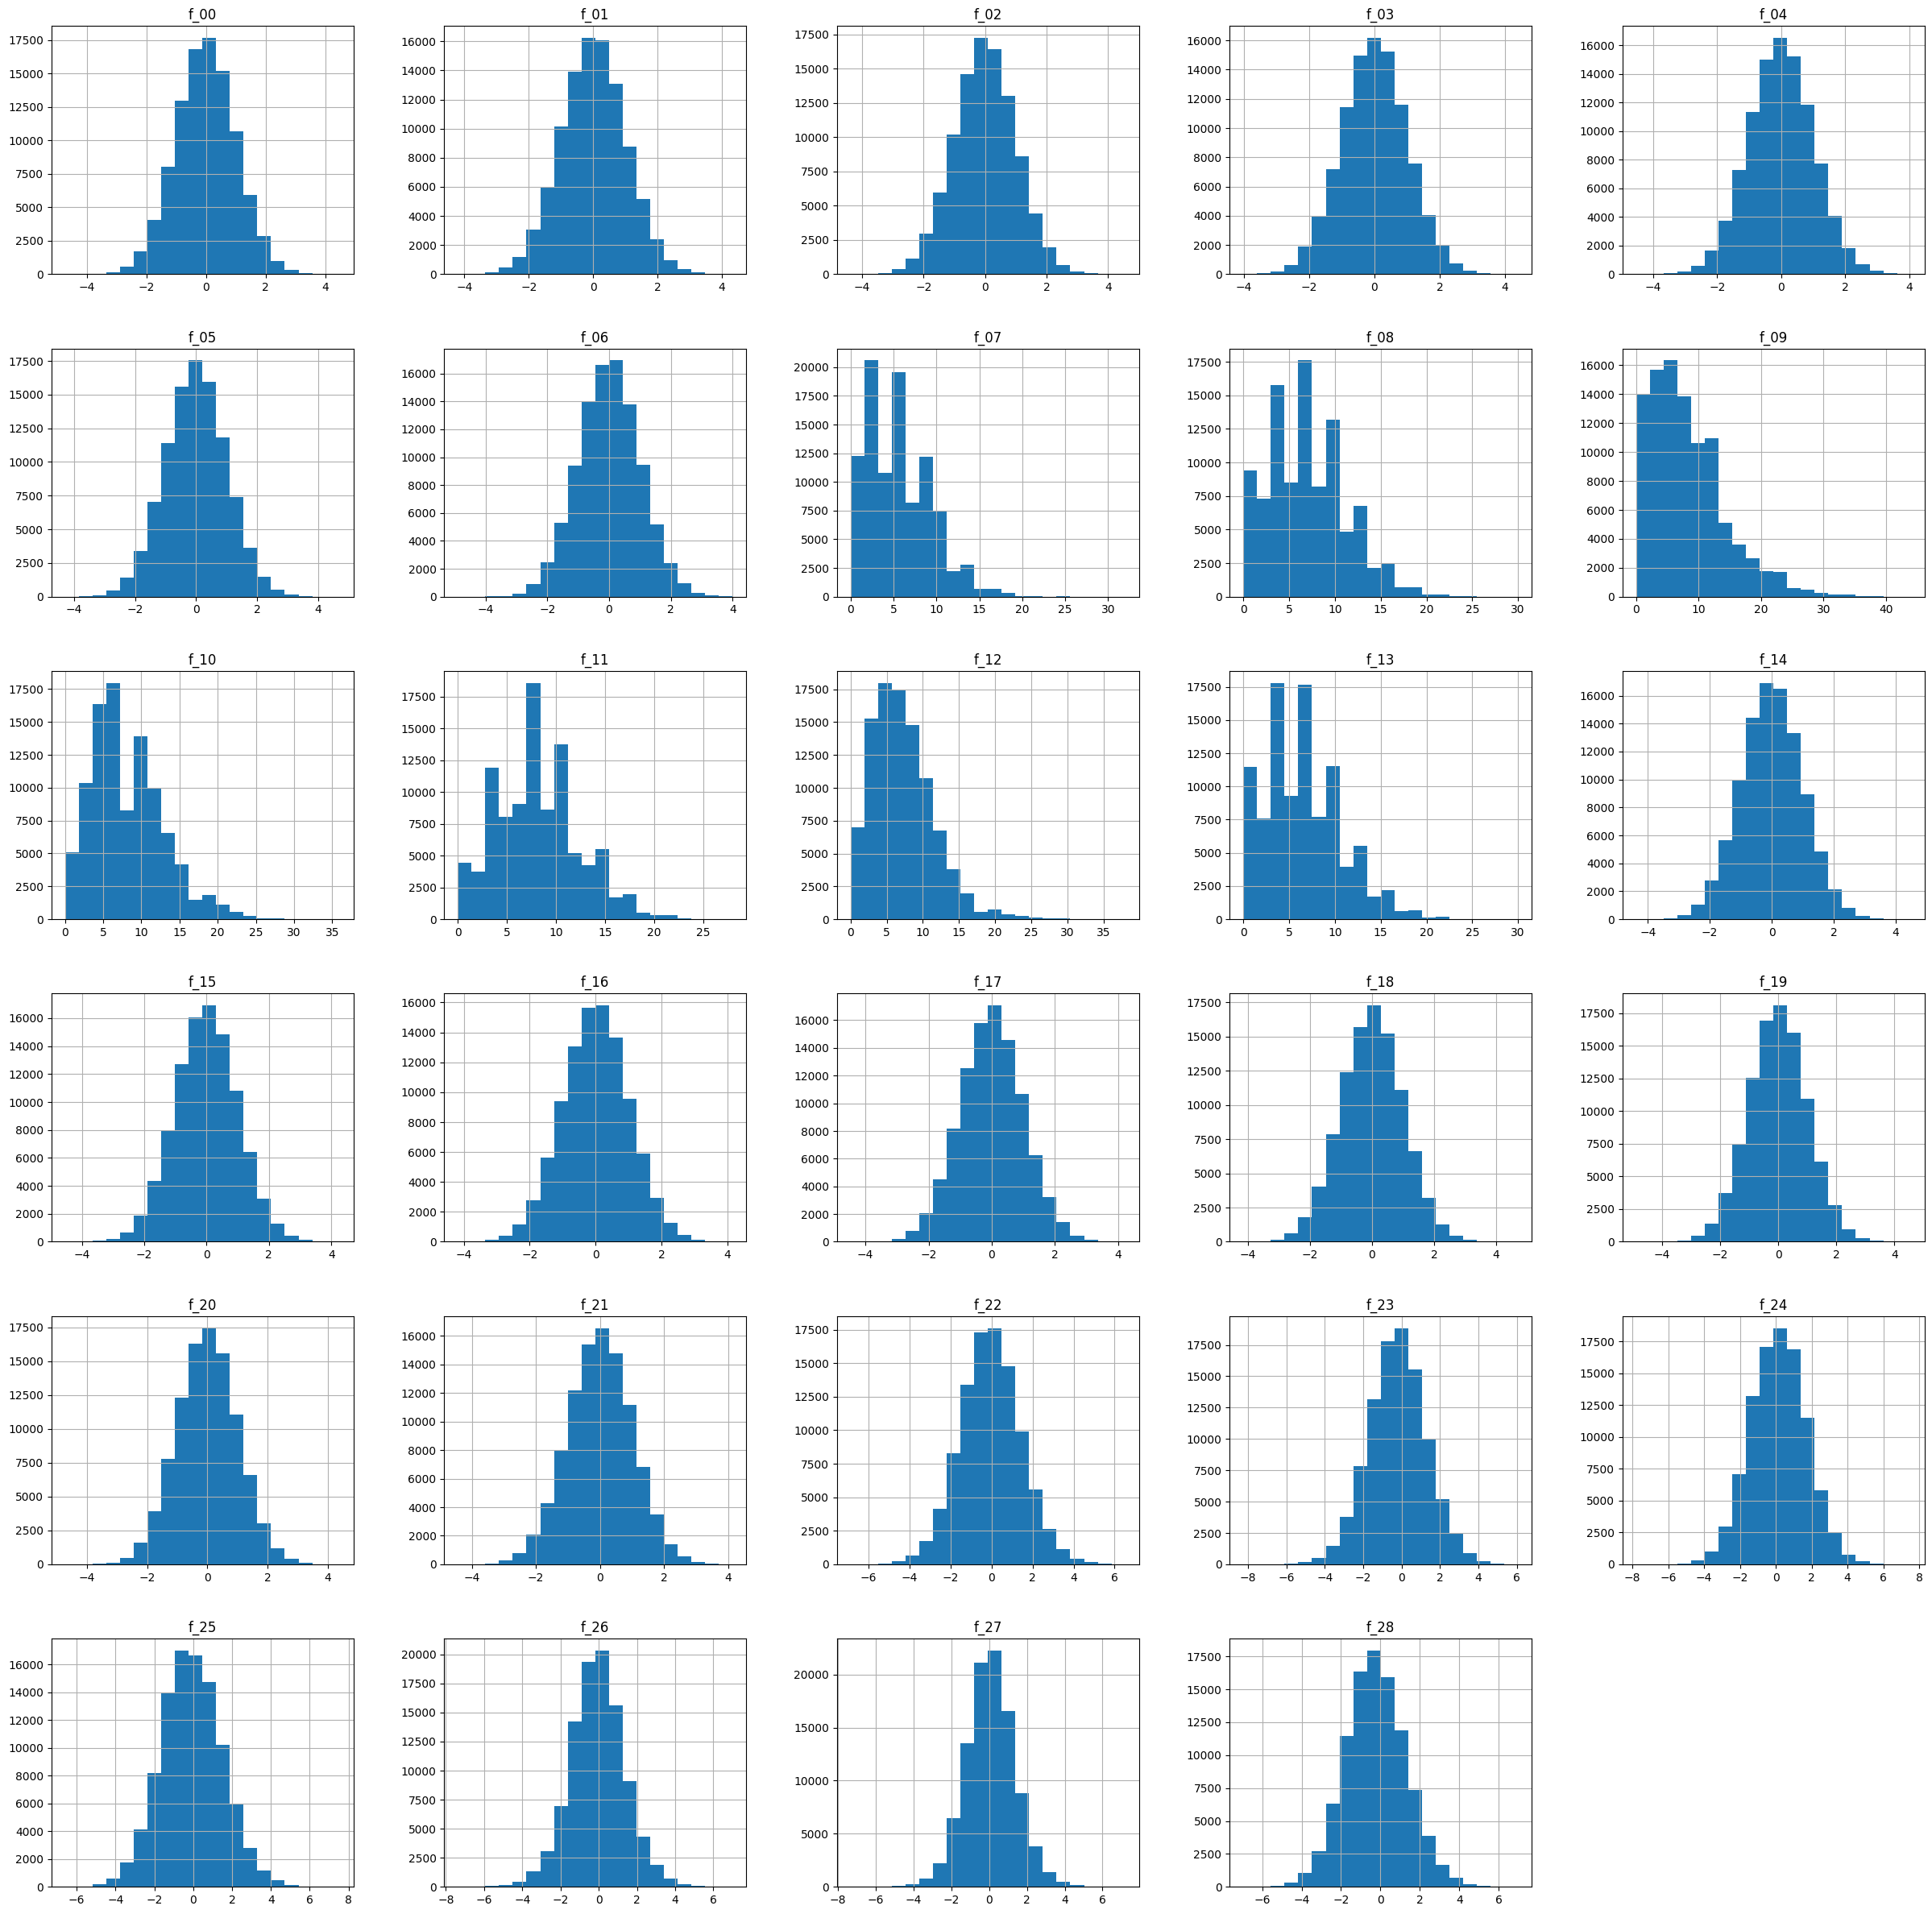

In [14]:
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(30, 30))
plt.show()

# Обучение модели

In [15]:
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

In [16]:
scaled_data = pd.DataFrame(PowerTransformer().fit_transform(data))

scaled_data.columns = data.columns

## Алгоритм кластеризации KMeans

In [37]:
%%time

model_km = KMeans(n_clusters=7, random_state=0)
preds_km = model_km.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



CPU times: user 12.2 s, sys: 1.07 s, total: 13.3 s
Wall time: 12.1 s


## Гауссовская смесь

In [31]:
%%time

model_gmm = GaussianMixture(n_components=7, random_state=0)
preds_gmm = model_gmm.fit_predict(data)

CPU times: user 22.4 s, sys: 10.9 s, total: 33.3 s
Wall time: 34 s


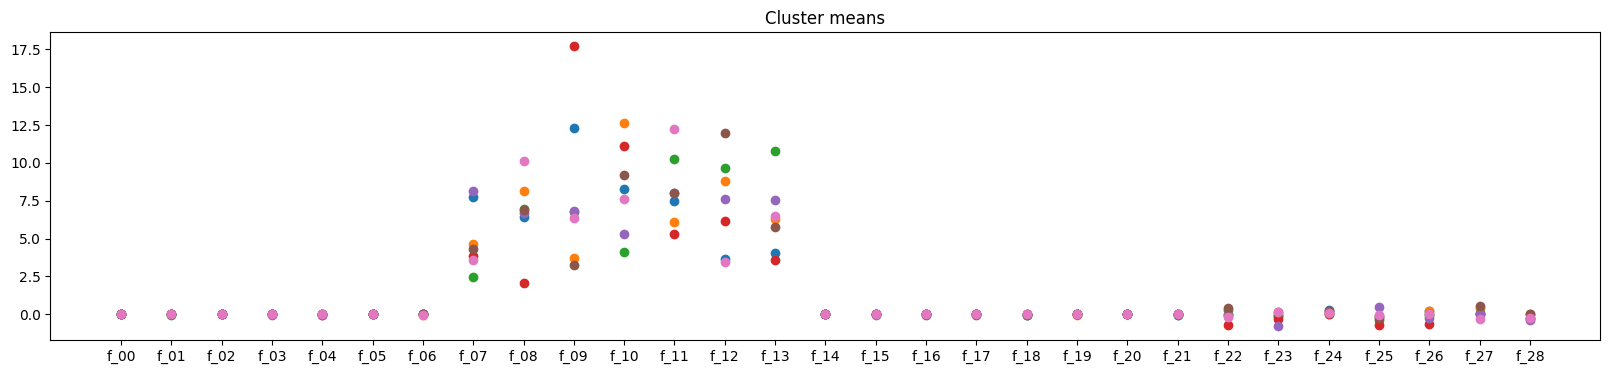

In [32]:
plt.figure(figsize=(20,4))
for i in range(model_gmm.means_.shape[0]):
    plt.scatter(np.arange(scaled_data.shape[1]), model_gmm.means_[i])
plt.xticks(ticks=np.arange(scaled_data.shape[1]), labels=scaled_data.columns)
plt.title('Cluster means')
plt.show()

In [33]:
%%time

# Уберем бесполезные признаки
drop_feats = [f'f_0{i}' for i in range(7)]
drop_feats = drop_feats + [f'f_{i}' for i in range(14,22)]
scaled_data_crop = scaled_data.drop(drop_feats, axis=1)


model_gmm_crop = GaussianMixture(n_components = 7, random_state=0)
preds_gmm_crop = model_gmm_crop.fit_predict(scaled_data_crop)

CPU times: user 9.62 s, sys: 5.72 s, total: 15.3 s
Wall time: 9.98 s


## Байесовская гауссовская смесь

In [21]:
%%time

model_bgmm = BayesianGaussianMixture(n_components=7, covariance_type='full', max_iter=100, n_init=5, init_params='random', random_state=0)
preds_bgmm = model_bgmm.fit_predict(scaled_data_crop)

CPU times: user 4min 38s, sys: 2min 37s, total: 7min 16s
Wall time: 4min 23s


In [34]:
from sklearn.metrics import silhouette_score

# KMeans
kmeans_silhouette = silhouette_score(scaled_data, preds_km)
print("Silhouette Score for KMeans:", kmeans_silhouette)

# Gaussian Mixture Model
gmm_silhouette = silhouette_score(data, preds_gmm)
print("Silhouette Score for Gaussian Mixture Model:", gmm_silhouette)

# Gaussian Mixture Model with cropped features
gmm_crop_silhouette = silhouette_score(scaled_data_crop, preds_gmm_crop)
print("Silhouette Score for Gaussian Mixture Model with cropped features:", gmm_crop_silhouette)

# Bayesian Gaussian Mixture Model
bgmm_silhouette = silhouette_score(scaled_data_crop, preds_bgmm)
print("Silhouette Score for Bayesian Gaussian Mixture Model:", bgmm_silhouette)

Silhouette Score for KMeans: 0.03193125411001578
Silhouette Score for Gaussian Mixture Model: 0.05744228286056201
Silhouette Score for Gaussian Mixture Model with cropped features: 0.042490808473398756
Silhouette Score for Bayesian Gaussian Mixture Model: 0.03554992012420908


In [23]:
# Добавление метрики в трекинг эксперимента
task.get_logger().report_scalar(title='Silhouette', series='metrics', value=bgmm_silhouette, iteration=1)

In [24]:
task.upload_artifact(name='Silhouette', artifact_object={'Silhouette': bgmm_silhouette})

True

In [25]:
task.close()

# Загрузка ответа

In [35]:
submission['Predicted'] = preds_bgmm

In [36]:
submission

,Id,Predicted
0,0,4
1,1,3
2,2,4
3,3,1
4,4,5
...,...,...
97995,97995,3
97996,97996,6
97997,97997,0
97998,97998,2


In [28]:
submission.to_csv('/content/submission.csv', index=False)

In [29]:
!kaggle competitions submit -c tabular-playground-series-jul-2022 -f submission.csv -m "task"

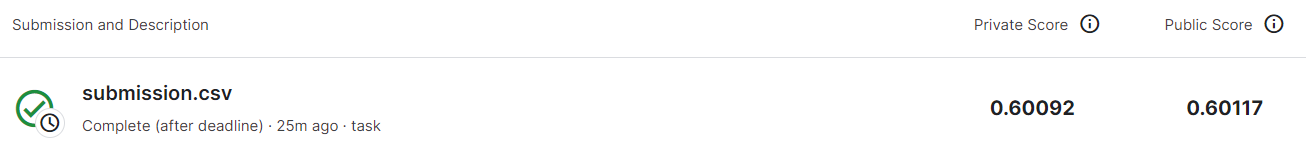